In [1]:
# Get the across-fjord profiles at selected x coorninate
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
state0 = xr.open_dataset('/Users/weiyangbao/Desktop/sill12/state_007.nc')
t0 = 60 # Start from day 30
tn = len(state0.T) # End day
state = state0.isel(Y = range(1,10), T = range(t0,tn)) # Remove the boundary walls in y direction

In [3]:
xloc = 28 #Location in x-axis
Qsg = 700
depth = state.Z.data
Y = state.Y.data
pt = state.Temp.data[:,:,:,xloc].mean(0) # Time average
s = state.S.data[:,:,:,xloc].mean(0)

u0 = state.U.data # dims = T, Z, Y, Xp1
u_tmean = (u0[:, :, :, 1:].mean(0) + u0[:, :, :, :-1].mean(0)) / 2
u = u_tmean[:,:,xloc]

v0 = state.V.data # dims = T,Z,Yp1,X
v_tmean = (v0[:, :, 1:, xloc].mean(0) + v0[:, :, :-1, xloc].mean(0)) / 2
v = v_tmean[:,1:10]

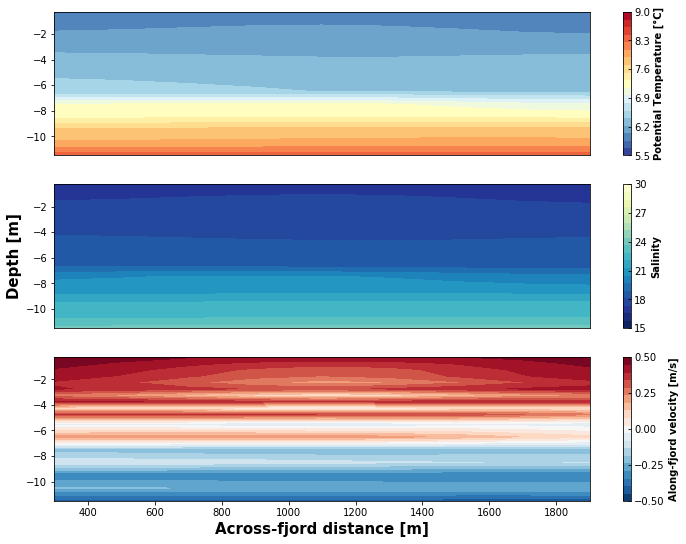

In [7]:
fig_path = "/Users/weiyangbao/Documents/Jupyter_Figs/Sill012/AcrossContourf/"
#fig_path = "/home/1959/Jupyter_Figs/sill30/UTcontourf/"
if not os.path.exists(fig_path):
    os.makedirs(fig_path)

mask = (pt == 0)
pt[mask] = np.nan
s[mask] = np.nan
u[mask] = np.nan
v[mask] = np.nan

ct = np.linspace(5.5,9,20) # Contour range for temperature
cs = np.linspace(15,30,20) # Contour range for salinity
cv = np.linspace(-0.5,0.5,20) # Contour range for velocity

fig = plt.figure(figsize=(12,9))

sl = 17 #Sill depth layer
ax1 = fig.add_subplot(311)
plt.contourf(Y,depth[:sl],pt[:sl,:], ct, cmap = 'RdYlBu_r')
cbar = plt.colorbar(ticks = np.linspace(5.5,9,6))
cbar.ax.tick_params(labelsize = 10, direction = 'in')
cbar.set_label('Potential Temperature [\N{DEGREE SIGN}C]', size = 10, weight = 'bold')
ax1.axes.get_xaxis().set_visible(False)


ax2 = fig.add_subplot(312)
plt.contourf(Y,depth[:sl],s[:sl,:], cs, cmap = 'YlGnBu_r')
cbar = plt.colorbar(ticks = np.linspace(15,30,6))
cbar.ax.tick_params(labelsize = 10, direction = 'in')
cbar.set_label('Salinity', size = 10, weight = 'bold')
ax2.set_ylabel('Depth [m]', size = 15, weight = 'bold')
ax2.axes.get_xaxis().set_visible(False)


ax3 = fig.add_subplot(313)
plt.contourf(Y,depth[:sl],u[:sl,:], cv, cmap = 'RdBu_r')
cbar = plt.colorbar(ticks = np.linspace(-0.5,0.5,5))
cbar.ax.tick_params(labelsize = 10, direction = 'in')
cbar.set_label('Along-fjord velocity [m/s]', size = 10, weight = 'bold')
ax3.set_xlabel('Across-fjord distance [m]', size = 15, weight = 'bold')
fig.savefig(fig_path + 'Qsg' + str(Qsg) + '.png', dpi = 150, bbox_inches='tight')